# Email/SMS Spam Filtering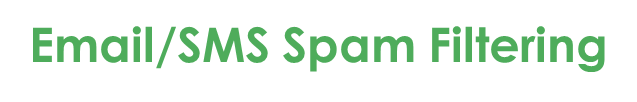

# 1- Introduction 

# 1.1 Background 

Spam filtering is a beginner’s example of document classification task which involves classifying an email as spam or non-spam (a.k.a. ham) mail.
Spam box in your Gmail account is the best example of this.
So lets get started in building a spam filter on a publicly available mail corpus. 
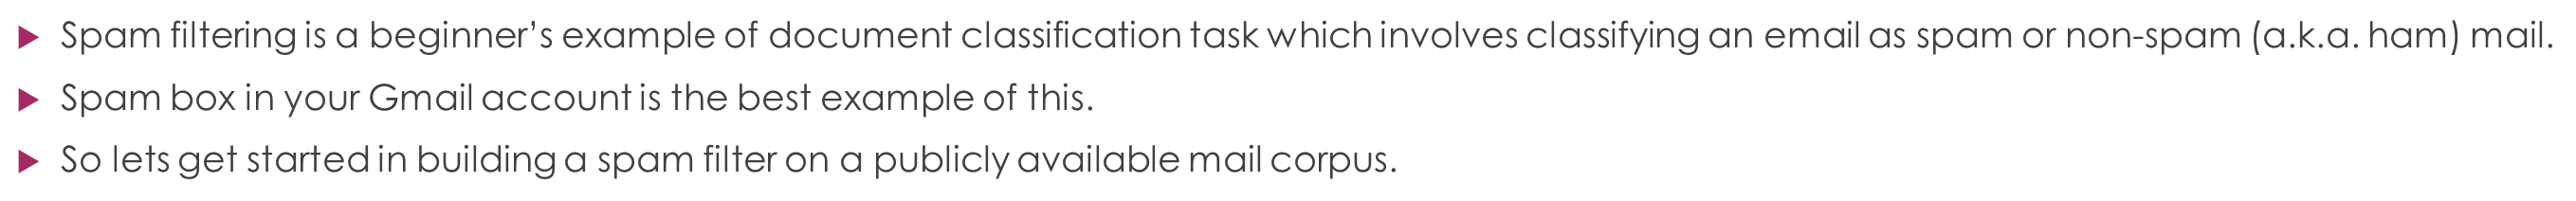

# 1.2 About The data sets which will be used 

# 2. Understanding the Data 

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

**Importing The required python packages**

In [2]:

##Load the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 2.1 Reading & Loading data sets 

In [3]:
#Load the dataset
# the data sets are in the same directory where the code present, so no need to specify the path 
# it seems that the file has no headers , let us create one 
#Header=Non: because the file has no header if we didn't say NON it will take the first column as a header
pd.set_option('display.max_colwidth', 200)
SMS_SH_df = pd.read_csv("SMSSpamCollection.csv", sep='\t', header=None)
SMS_SH_df.columns = ['label', 'body_text']
SMS_SH_df.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


# 2.2 Exploring the data set

In [4]:
#DataFrame.shape ==>Return a tuple representing the dimensionality of the DataFrame.
SMS_SH_df.shape

(5568, 2)

In [5]:
#How many rows are spam or ham 
SMS_SH_df.label.value_counts()

ham     4822
spam     746
Name: label, dtype: int64

In [6]:
SMS_SH_df.label.value_counts(normalize=True)

ham     0.86602
spam    0.13398
Name: label, dtype: float64

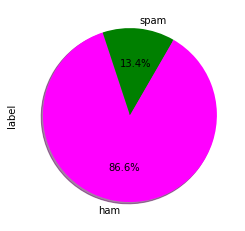

In [7]:
# Change pie chart colors here
colors = ["magenta", "green", "purple", "orange"]
SMS_SH_df.label.value_counts().plot.pie( autopct='%1.1f%%', shadow=True,startangle=60, counterclock=False,colors=colors)
plt.show()

In [8]:
#How many NULLs/ missing values
SMS_SH_df.isnull().value_counts()

label  body_text
False  False        5568
dtype: int64

In [9]:
df=SMS_SH_df.copy()

# 3. Data Preparation-Pre-processing text data


Ultimate goals from the Pre-processing text data is 
To bring the text into a form that is predictable and analyzable for our task
by
Reducing the corpus of words that exposed to the model
Explicitly correlate the word with similar meaning 


### 3.1 Remove punctuation

### 3.2 Converting text to lowercase
   python is case sensetive , is lower to save resources in compresion 

## 3.3 Tokenization

 


Tokenization is one of the most common tasks when it comes to working with text data
Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.



### 3.4 Remove stopwords

**Stopwords** are common words that are present in the text but generally do not contribute to the meaning of a sentence. They hold almost no importance for the purposes of information retrieval and natural language processing. They can safely be ignored without sacrificing the meaning of the sentence. For example – ‘the’ and ‘a’.


In [10]:
stopwords_En = nltk.corpus.stopwords.words('english')

 ### 3.5 Using Stemming
 
 
    --Stemming.  Is the process of reducing inflected or derived words to their word stem or root. 
    --Stemming is aiming to reduce variations of the same root word. 


In [11]:
ps = nltk.PorterStemmer()

### Data Cleaning 
Create function to remove punctuation, tokenize, remove stopwords, and stem

In [12]:
### Create function to remove punctuation, tokenize, remove stopwords, and stem

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
     #tokens = re.split('\W+', text)
    tokens = word_tokenize(text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords_En])
    return text
df=df[['label','body_text']]
df['cleaned_text'] = df['body_text'].apply(lambda x: clean_text(x))
#df=df.drop(['body_text'], axis=1)
df.head()

,label,body_text,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


# 4. Vectorizing text data

**Vectorizing :** The process that we use to convert text to a form that Python and a machine learning model can understand,will Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occurred in that document.


This is defined as the process of encoding text as integers to create feature vectors. 
A feature vector is an n-dimensional vector of numerical features that represent some object. So in our context, that means we'll be taking an individual text message and converting it to a numeric vector that represents that text message. 


There are many vectorization techniques, we will focus on the three widely used vectorization techniques:

     --Count vectorization
     --N-Grams.
     --Term frequency - inverse document frequency (TF-IDF)



## 4.1 Vectorizing The data using TF-IDF 


We will create a matrix that only has numeric entries counting how many times each word appears in each text message. The machine learning algorithm understands these counts. So if it sees a one or a two or a three in a cell, then that model can start to correlate that with whatever we're trying to predict 

In [13]:
#tfidf = TfidfVectorizer(min_df=1)
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf = TfidfVectorizer( ngram_range=(1,1))
features_tfidf = tfidf.fit_transform(df['cleaned_text'])
#print(features_tfidf.shape)
#print('Sparse Matrix :\n', features_tfidf)
features_tfidf = pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns = tfidf.get_feature_names()
#features_tfidf



# 6. Model Building

In [14]:
target= df['label']
final_df=df.drop(['label', 'body_text', 'cleaned_text'], axis=1)
final_df = pd.concat([final_df, pd.DataFrame(features_tfidf)], axis=1)
final_df.head()

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6.3 Split Training and Testing Data Sets

The train-test split is a technique for evaluating the performance of a machine learning algorithm, It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. 

    Train Dataset: Used to fit the machine learning model.
    Test Dataset: Used to evaluate the fit machine learning model: not used to train the model
    
**The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.**


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df,target,test_size=0.20)

## 6.4 Random Forest  Algorithem 

In [16]:
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [17]:
rf_model.score(X_test,y_test)

0.981149012567325

In [18]:
rf_model = RandomForestClassifier(n_jobs=-1,n_estimators=200)
rf_model.fit(X_train, y_train)
rf_model.score(X_test,y_test)

0.9820466786355476

### 6.4.1 Checking the feature_importances

In [19]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.030961294127054347, 'call'),
 (0.030076648079300296, 'free'),
 (0.02707866470171966, 'mobil'),
 (0.025091422624957102, 'claim'),
 (0.02250956302669651, 'txt'),
 (0.01901017526713222, 'prize'),
 (0.01642801449836088, 'repli'),
 (0.014170349412474042, 'servic'),
 (0.013735738786519614, 'stop'),
 (0.013444972270681295, 'win')]

# 7:  Data Splitting techniques

### 7.2 Explore RandomForestClassifier through Cross-Validation

In [20]:
from sklearn.model_selection import KFold, cross_val_score

In [21]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, final_df, target, cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.97666068, 0.97755835, 0.97666068, 0.9640611 , 0.97124888])

# 8:  Model evaluation :Accuracy & Confusion Matrix

Classification accuracy is the ratio of correct predictions to total predictions made.

classification accuracy = correct predictions / total predictions * 100

**Classification accuracy is a great place to start, but often encounters problems in practice.**



In [22]:
Accuracy= round(rf_model.score(X_test,y_test),3)
Accuracy

0.982

In [23]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
y_pred = rf_model.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
cm

array([[977,   0],
       [ 20, 117]])

In [24]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives
Accuracy=(TP+TN)/(TP+TN+FN+FP)
print('Accuracy : ', round(Accuracy,3))
Precision = TP / (TP + FP)
print('Precision : ', round(Precision,3))

Recall = TP/(TP + FN)
print('Recall : ', round(Recall,3))

Accuracy :  0.982
Precision :  1.0
Recall :  0.854


In [25]:
message = tfidf.transform(["i'm on my way home"])
message = message.toarray()
message
rf_model.predict(message)


array(['ham'], dtype=object)

In [26]:
message = tfidf.transform(["Free entry"])
message = message.toarray()
message
rf_model.predict(message)

array(['ham'], dtype=object)

In [27]:
import pickle
import joblib
import pickle
X =df['cleaned_text']
X= tfidf_vect.fit_transform(X) # Fit the Data
pickle.dump(tfidf_vect, open('tranform.pkl', 'wb'))

In [28]:
filename = 'rf_spam_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))
joblib.dump(rf_model, 'rf_spam_model.pkl')
rf_spam_model = open('rf_spam_model.pkl','rb')
rf_model = joblib.load(rf_spam_model)

In [29]:
pip freeze > requirements3.txt

Note: you may need to restart the kernel to use updated packages.
